In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [1]:
from google.colab import files
uploaded = files.upload()


Saving 7817_1.csv.zip to 7817_1.csv.zip


In [2]:
!wget https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv -O amazon_reviews.csv


--2025-10-08 08:43:48--  https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3103165 (3.0M) [text/plain]
Saving to: ‘amazon_reviews.csv’

amazon_reviews.csv  100%[===================>]   2.96M  --.-KB/s    in 0.07s   

2025-10-08 08:43:49 (45.0 MB/s) - ‘amazon_reviews.csv’ saved [3103165/3103165]



In [5]:
import pandas as pd

df = pd.read_csv('/content/7817_1.csv.zip')
print(df.head())
print(df['reviews.rating'].value_counts())

                     id       asins   brand                  categories  \
0  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
1  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
2  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
3  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
4  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   

  colors             dateAdded           dateUpdated  \
0    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
1    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
2    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
3    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
4    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   

                  dimension  ean                         keys  ...  \
0  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
1  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
2 

In [12]:
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Clean text function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Assuming the review text is in 'reviews.text' column
df['clean_review'] = df['reviews.text'].apply(clean_text)
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight,clean_review,sentiment
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams,i initially had trouble deciding between the p...,1
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams,allow me to preface this with a little history...,1
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams,i am enjoying it so far great for reading had ...,1
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams,i bought one of the first paperwhites and have...,1
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams,i have to say upfront i dont like coroporate ...,1


In [13]:
# Assuming the sentiment is in 'reviews.rating' column and converting it to binary (e.g., 1 for positive, 0 for negative)
# You might need to adjust the threshold based on your definition of positive/negative reviews
df['sentiment'] = df['reviews.rating'].apply(lambda x: 1 if x >= 4 else 0)

X = df['clean_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [14]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.721875

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.55      0.59       118
           1       0.76      0.82      0.79       202

    accuracy                           0.72       320
   macro avg       0.70      0.69      0.69       320
weighted avg       0.72      0.72      0.72       320



In [15]:
sample_reviews = [
    "The product is excellent and very useful!",
    "It stopped working after two days. Waste of money."
]

sample_clean = [clean_text(r) for r in sample_reviews]
sample_tfidf = vectorizer.transform(sample_clean)
predictions = model.predict(sample_tfidf)

for review, sentiment in zip(sample_reviews, predictions):
    print(f"Review: {review}\nPredicted Sentiment: {'Positive' if sentiment==1 else 'Negative'}\n")

Review: The product is excellent and very useful!
Predicted Sentiment: Positive

Review: It stopped working after two days. Waste of money.
Predicted Sentiment: Negative



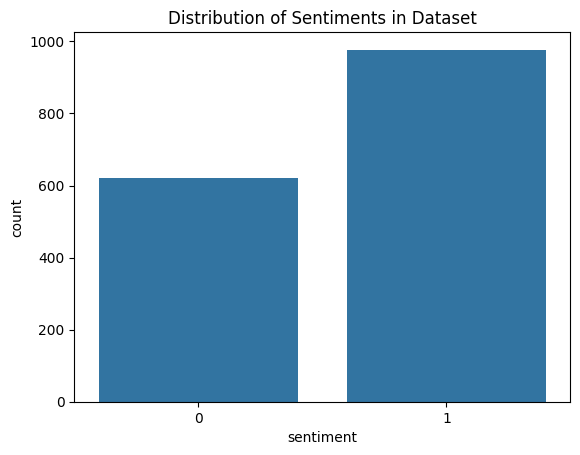

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the sentiment is in the new 'sentiment' column
sns.countplot(x='sentiment', data=df)
plt.title("Distribution of Sentiments in Dataset")
plt.show()

In [17]:
# Assuming the review text is in 'reviews.text' and the original sentiment is in 'reviews.rating'
for i in range(5):
    print(f"Review: {df['reviews.text'][i]}")
    print(f"Original Rating: {df['reviews.rating'][i]}")
    print(f"Predicted Sentiment: {'Positive' if y_pred[i]==1 else 'Negative'}")
    print("-----")

Review: I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry a